# ME 513: Thermodynamics Assignment 2

## 0. Problem Statement

Steam heated at constant pressure in a steam generator enters the first stage of a
supercritical reheat cycle at 28 MPa, 520°C. Steam exiting the first-stage turbine at 6 MPa is
reheated at constant pressure to 500°C. Each turbine stage has an isentropic efficiency of 78%
while the pump has an isentropic efficiency of 82%. Saturated liquid exits the condenser that
operates at constant pressure, p.

1. For p = 6 kPa, determine the quality of the steam exiting the second stage of the turbine and the thermal efficiency.
2. Plot the quantities of part (1) versus p ranging from 4 kPa to 70 kPa.

Be sure to specify all assumptions and comment on the functionality of the code. To access thermodynamic tables, uncomment and run the line below to install PYroMat.

In [1]:
# pip install pyromat
# pip install matplotlib

Below are suggested imports for completing the project. Be sure to run the imports before running any code. Additional code is provided for setting the units that returned values will have.

In [10]:
import pyromat
from matplotlib import pyplot as plt

# pyromat.config["unit_energy"] = "BTU"
# pyromat.config["unit_force"] = "lbf"
# pyromat.config["unit_length"] = "in"
# pyromat.config["unit_mass"] = "lb"
# pyromat.config["unit_matter"] = "lb"
# pyromat.config["unit_molar"] = "lbmol"
pyromat.config["unit_pressure"] = "MPa"
pyromat.config["unit_temperature"] = "C"
# pyromat.config["unit_volume"] = "ft3"
H2O = pyromat.get("mp.H2O")

Before solving, the states must be set.

In [3]:
# General
nt1 = 0.78 # dimensionless
nt2 = 0.78 # dimensionless
np1 = 0.82 # dimensionless

# State 1
p1 = 28 # MPa
T1 = 520 # deg C
h1 = H2O.h(T=T1, p=p1) # kJ/kg
s1 = H2O.s(T=T1, p=p1) # kJ/(kg*K)

# State 2
p2 = 6 # MPa
h2s = H2O.h(s=s1) # kJ/kg
h2 = h1 - nt1 * (h1 - h2s) # kJ/kg

# State 3
p3 = 6 # MPa
T3 = 500 # deg C
h3 = H2O.h(p=p3, T=T3)
s3 = H2O.s(p=p3, T=T3)

# State 4
p4 = 6e-3 # MPa
x4s = H2O.T(s=s3, p=p4, quality=True)[1]
h4s = H2O.h(p=p4, x=x4s)
h4 = h3 - nt2 * (h3 - h4s)

# State 5
p5 = 6e-3 # MPa
h5 = H2O.h(p=p5, x=0)
v5 = H2O.v(p=p5, x=0)

# State 6
p6 = p1 # MPa
h6 = h5 + 1000 * v5 * (p6 - p5) / (np1)

## 1. Quality of the Steam and Thermal Efficiency

In [7]:
# Find the quality of the steam
hf4 = H2O.h(p=p4, x=0)
hfg4 = H2O.h(p=p4, x=1) - H2O.h(p=p4, x=0)
x4 = (h4 - hf4) / hfg4
print(f"x4 = {x4[0]:.4f}")

# Find the thermal efficiency of the cycle
n = ((h1 - h2) + (h3 - h4) - (h6 - h5)) / ((h1 - h6) + (h3 - h2))
print(f"n = {100*n[0]:.2f}%")

x4 = 0.9335
n = 35.76%


## 2. Plot for a Range of Pressures

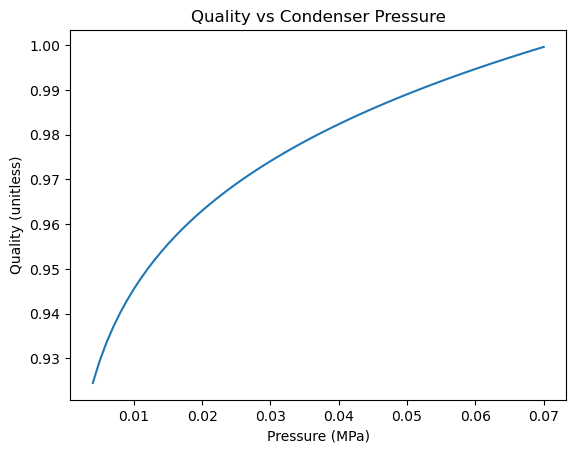

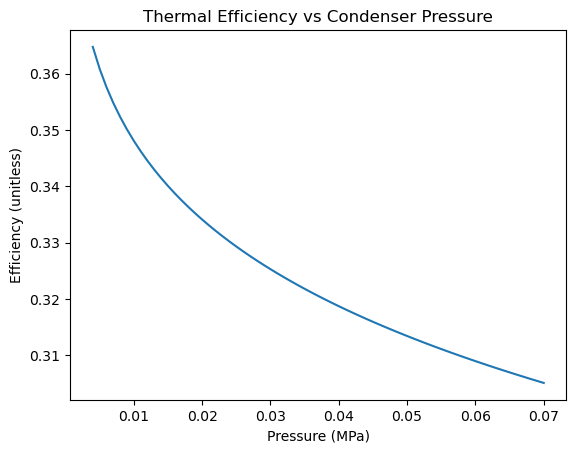

In [23]:
p_list = [x * 10**(-3) for x in range(4, 71)]
x_list = []
n_list = []

for p in p_list:
    # State 4
    p4 = p # MPa
    x4s = H2O.T(s=s3, p=p4, quality=True)[1]
    h4s = H2O.h(p=p4, x=x4s)
    h4 = h3 - nt2 * (h3 - h4s)

    # State 5
    p5 = p # MPa
    h5 = H2O.h(p=p5, x=0)
    v5 = H2O.v(p=p5, x=0)

    # State 6
    h6 = h5 + 1000 * v5 * (p6 - p5) / (np1)

    # Find the quality of the steam
    hf4 = H2O.h(p=p4, x=0)
    hfg4 = H2O.h(p=p4, x=1) - H2O.h(p=p4, x=0)
    x4 = (h4 - hf4) / hfg4
    x_list.append(x4)

    # Find the thermal efficiency of the cycle
    n = ((h1 - h2) + (h3 - h4) - (h6 - h5)) / ((h1 - h6) + (h3 - h2))
    n_list.append(n)

plt.figure()
plt.plot(p_list, x_list)
plt.title("Quality vs Condenser Pressure")
plt.xlabel("Pressure (MPa)")
plt.ylabel("Quality (unitless)")
plt.show()

plt.figure()
plt.plot(p_list, n_list)
plt.title("Thermal Efficiency vs Condenser Pressure")
plt.xlabel("Pressure (MPa)")
plt.ylabel("Efficiency (unitless)")
plt.show()